In [1]:
%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

rc('font', family='Malgun Gothic')  # Windows 일 경우
# rc('font', family='AppleGothic')  # Mac 일 경우

import numpy as np
import pandas as pd

In [2]:
import pandas as pd

url = "https://finance.naver.com/marketindex/exchangeList.nhn"

df = pd.read_html(url)[0]
df.columns = [
    '통화명', '매매기준율', '현찰 - 사실 때', '현찰 - 파실 때',
    '송금 - 보내실 때', '송금 - 받으실 때', '미화환산율',
]
df = df.set_index('통화명')

print(df.shape)
df.head()

(44, 6)


,매매기준율,현찰 - 사실 때,현찰 - 파실 때,송금 - 보내실 때,송금 - 받으실 때,미화환산율
통화명,,,,,,
미국 USD,1132.50,1152.31,1112.69,1143.50,1121.50,1.000
유럽연합 EUR,1281.48,1306.98,1255.98,1294.29,1268.67,1.132
일본 JPY (100엔),996.83,1014.27,979.39,1006.59,987.07,0.880
중국 CNY,163.10,171.25,154.95,164.73,161.47,0.144
홍콩 HKD,144.62,147.46,141.78,146.06,143.18,0.128


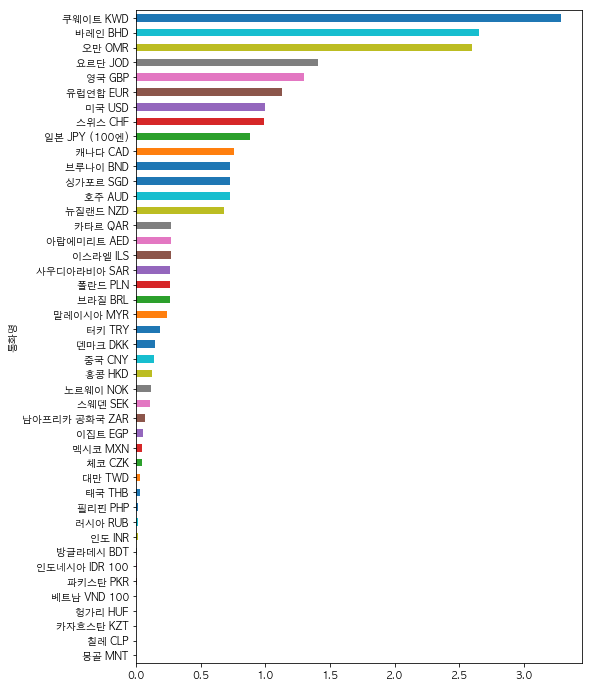

In [12]:
ax = df['미화환산율'].sort_values().plot(kind='barh', figsize=(8, 12))  # line, bar, barh, pie
ax

In [ ]:
# 시스템에 등록된 TTF 폰트 목록
from matplotlib import font_manager

font_manager.fontManager.ttflist

## EP06

In [14]:
df1 = pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
])
df1

,0,1,2
0,1,2,3
1,4,5,6


In [16]:
df2 = pd.DataFrame([
    [4, 5, 6],
])
df2

,0,1,2
0,4,5,6


In [17]:
df1 + df2

,0,1,2
0,5.0,7.0,9.0
1,NaN,NaN,NaN


In [18]:
np.nan

nan

## pd.concat

In [21]:
df_2016_01 = pd.read_excel('data/2016-01.xls')
print(df_2016_01.shape)
df_2016_01.head()

(200, 3)


,상품명,판매건수,가격
0,봉투,12362,50
1,바나나,4285,3900
2,야채,4190,0
3,켐벨포도,2780,29800
4,알뜰특란,2768,5300


In [22]:
df_2016_01 = pd.read_excel('data/2016-01.xls')#, index_col='상품명')
df_2016_02 = pd.read_excel('data/2016-02.xls')
df_2016_03 = pd.read_excel('data/2016-03.xls')

In [29]:
df_list = [df_2016_01, df_2016_02, df_2016_03]

df_2016_1q = pd.concat(df_list, axis="index")
print(df_2016_1q.shape)
df_2016_1q.head()

(600, 3)


,상품명,판매건수,가격
0,봉투,12362,50
1,바나나,4285,3900
2,야채,4190,0
3,켐벨포도,2780,29800
4,알뜰특란,2768,5300


In [31]:
# 개선
df_2016_01['년월'] = '2016-01'
df_2016_02['년월'] = '2016-02'
df_2016_03['년월'] = '2016-03'

df_list = [df_2016_01, df_2016_02, df_2016_03]

df_2016_1q = pd.concat(df_list, axis="index")
df_2016_1q = df_2016_1q.set_index('상품명')   # addded
print(df_2016_1q.shape)
df_2016_1q.head()

(600, 3)


,판매건수,가격,년월
상품명,,,
봉투,12362,50,2016-01
바나나,4285,3900,2016-01
야채,4190,0,2016-01
켐벨포도,2780,29800,2016-01
알뜰특란,2768,5300,2016-01


In [36]:
df_2016_1q.loc['봉투']

,판매건수,가격,년월
상품명,,,
봉투,12362,50,2016-01
봉투,2038,30,2016-01
봉투,10519,50,2016-02
봉투,1823,30,2016-02
봉투,11902,50,2016-03
봉투,2072,30,2016-03


In [39]:
df_2016_1q['매출'] = df_2016_1q['판매건수'] * df_2016_1q['가격']
df_2016_1q.head()

,판매건수,가격,년월,매출
상품명,,,,
봉투,12362,50,2016-01,618100
바나나,4285,3900,2016-01,16711500
야채,4190,0,2016-01,0
켐벨포도,2780,29800,2016-01,82844000
알뜰특란,2768,5300,2016-01,14670400


In [40]:
df_2016_1q['매출'].sum()

1217924740

In [56]:
import os
import glob   # python 3.4부터는 pathlib이 지원
import datetime

# now = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# print(now)

# # date-util
# yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
# print(yesterday)

df_list = []

for xls_path in glob.glob('data/2016-*.xls*'):
    print(xls_path)
    
    filename = os.path.basename(xls_path)
    yearmonth, ext = os.path.splitext(filename)

    df = pd.read_excel(xls_path, index_col='상품명')
    df['년월'] = yearmonth
    
    df_list.append(df)
    
len(df_list)

data/2016-04.xls
data/2016-05.xls
data/2016-06.xls
data/2016-02.xls
data/2016-03.xls
data/2016-01.xls


6

In [57]:
df_2016_1q = pd.concat(df_list)
print(df_2016_1q.shape)
df_2016_1q.head()

(1200, 3)


,판매건수,가격,년월
상품명,,,
봉투,12414,50,2016-04
알뜰특란,5217,5300,2016-04
백오이,4236,1490,2016-04
바나나,3726,3900,2016-04
야채,3372,0,2016-04


In [59]:
df_2016_1q['매출'] = df_2016_1q['판매건수'] * df_2016_1q['가격']

df_2016_1q.to_excel("data/2016-1q.xlsx")

In [54]:
import os

path = "data/2016-04.xls"
filename = os.path.basename(path)   # <-> os.path.dirname
print(filename)
yearmonth, ext = os.path.splitext(filename)
yearmonth

2016-04.xls


'2016-04'

In [64]:
# df_2016_1q = df_2016_1q.drop('매출', axis="columns")
# df_2016_1q.drop('매출', axis="columns", inplace=True)
df_2016_1q.drop(columns="매출", inplace=True)
df_2016_1q.head()

,판매건수,가격,년월
상품명,,,
봉투,12414,50,2016-04
알뜰특란,5217,5300,2016-04
백오이,4236,1490,2016-04
바나나,3726,3900,2016-04
야채,3372,0,2016-04


In [66]:
# df_2016_1q.drop("봉투", axis="index", inplace=True)
df_2016_1q.drop(index="봉투", inplace=True)
df_2016_1q.head()

,판매건수,가격,년월
상품명,,,
알뜰특란,5217,5300,2016-04
백오이,4236,1490,2016-04
바나나,3726,3900,2016-04
야채,3372,0,2016-04
애호박,3011,1490,2016-04
